In [1]:
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

from numpy import mean,sqrt
import pickle

import scipy

In [2]:
# 8um AGN luminosity function from http://authors.library.caltech.edu/20659/ , Fig 6

agnlfdat = np.genfromtxt('Hu2010_AGN_LF.csv',delimiter=',')
lognuLnu_over_Lsun_agn = agnlfdat[:,0]
logphi_per_logL_agn = agnlfdat[:,1]

d_lognuLnu_over_Lsun_agn = .5*(lognuLnu_over_Lsun_agn[1:]-lognuLnu_over_Lsun_agn[:-1])
N_in_bins_agn = 10.**logphi_per_logL_agn[:-1]*d_lognuLnu_over_Lsun_agn
print(np.sum(N_in_bins_agn))

5.45091218049e-05


In [3]:
# 8um SF luminosity function from http://authors.library.caltech.edu/20659/ , Fig 6

sflfdat = np.genfromtxt('Hu2010_SF_LF.csv',delimiter=',')
lognuLnu_over_Lsun_sf = sflfdat[:,0]
logphi_per_logL_sf = sflfdat[:,1]

d_lognuLnu_over_Lsun_sf = .5*(lognuLnu_over_Lsun_sf[1:]-lognuLnu_over_Lsun_sf[:-1])
N_in_bins_sf = 10.**logphi_per_logL_sf[:-1]*d_lognuLnu_over_Lsun_sf
np.sum(N_in_bins_sf)

0.0020936680133190077

In [4]:
def phi_L_sf(L,Lstar,phistar,alpha,sigma):
    return phistar*(L/Lstar)**(1+alpha)*np.exp(-.5*(np.log10(1+L/Lstar)/sigma)**2)
def phi_L_agn(L,Lstar,phistar,alpha,beta):
    return phistar/((L/Lstar)**alpha+(L/Lstar)**beta)

In [5]:
# luminosity function of star forming galaxies at 1.4GHz
# Sec. 5.3 in Mauch & Sadler 2006, https://arxiv.org/abs/astro-ph/0612018v1

phistar_sf_rad = 10.**(-2.83)/2.5 # 1/(mag*Mpc^3), dividing by 2.5 converts from per mag to per dex
Lstar_sf_rad = 10.**(21.18) # W/Hz
alpha_sf_rad = -1.02
sigma_sf_rad = 0.6

In [6]:
# luminosity function of AGN at 1.4GHz
# Sec. 5.3 in Mauch & Sadler 2006, https://arxiv.org/abs/astro-ph/0612018v1

phistar_agn_rad = 10.**(-5.5)/2.5 # 1/(mag*Mpc^3)
Lstar_agn_rad = 10.**(24.59) # W/Hz
alpha_agn_rad = 1.27
beta_agn_rad = 0.49

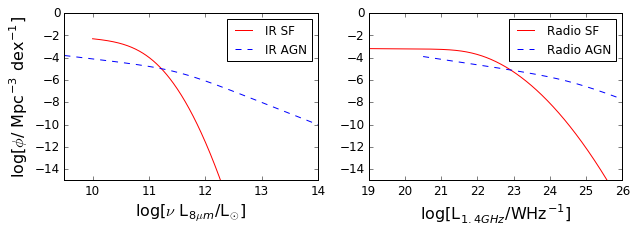

In [93]:
matplotlib.rcParams['mathtext.fontset'] = 'custom'
matplotlib.rcParams['mathtext.rm'] = 'Bitstream Vera Sans'
matplotlib.rcParams['mathtext.it'] = 'Bitstream Vera Sans:italic'
matplotlib.rcParams['mathtext.bf'] = 'Bitstream Vera Sans:bold'

matplotlib.rcParams.update({'font.size': 12})
plt.figure(figsize=(10,3))
plt.subplot(121)
# plt.plot(lognuLnu_over_Lsun_agn,logphi_per_logL_agn,'.')
# plt.plot(lognuLnu_over_Lsun_sf,logphi_per_logL_sf,'.')

def phi_L_sf_ir(L):
    return phi_L_sf(L,10.**10.53,10.**(-2.42),-1.32,.235)
def phi_L_agn_ir(L):
    return phi_L_agn(L,10.**11.5,10.**(-5),.6,2.)

logL_ir_sf = np.linspace(10,14,400)
dlogL_ir_sf = logL_ir_sf[1]-logL_ir_sf[0]

logL_ir_agn = np.linspace(9.5,14,400)
dlogL_ir_agn = logL_ir_agn[1]-logL_ir_agn[0]

plt.plot(logL_ir_sf,np.log10(phi_L_sf_ir(10.**logL_ir_sf)),'r',label='IR SF')
plt.plot(logL_ir_agn,np.log10(phi_L_agn_ir(10.**logL_ir_agn)),'b--',label='IR AGN')
plt.ylim([-15,0])
plt.legend(fontsize=12)
plt.ylabel('log[$\phi$/ Mpc$^{-3}$ dex$^{-1}$]',fontsize=16)
plt.xlabel('log[$\\nu$ L$_{8\mu m}$/L$_{\odot}$]',fontsize=16)
plt.gca().set_xticks([10,11,12,13,14])

plt.subplot(122)

logL_rad_sf = np.linspace(19,26,400)
dlogL_rad_sf = logL_rad_sf[1]-logL_rad_sf[0]

logL_rad_agn = np.linspace(20.5,26,400)
dlogL_rad_agn = logL_rad_agn[1]-logL_rad_agn[0]

def phi_L_sf_rad(L):
    return phi_L_sf(L,Lstar_sf_rad,phistar_sf_rad,alpha_sf_rad,sigma_sf_rad)
def phi_L_agn_rad(L):
    return phi_L_agn(L,Lstar_agn_rad,phistar_agn_rad,alpha_agn_rad,beta_agn_rad)

plt.plot(logL_rad_sf,np.log10(phi_L_sf_rad(10.**logL_rad_sf)),'r',label='Radio SF')
plt.plot(logL_rad_agn,np.log10(phi_L_agn_rad(10.**logL_rad_agn)),'b--',label='Radio AGN')
plt.legend(fontsize=12)
plt.ylim([-15,0])
plt.xlabel('log[L$_{1.4GHz}$/WHz$^{-1}$]',fontsize=16)

plt.savefig('sim_rad_ir_luminosity_functions.pdf',bbox_inches='tight')

In [8]:
# what is the total number density of objects?

n_sf_ir = np.sum(phi_L_sf_ir(10.**logL_ir_sf)*dlogL_ir_sf)
n_agn_ir = np.sum(phi_L_agn_ir(10.**logL_ir_agn)*dlogL_ir_agn)

n_sf_rad = np.sum(phi_L_sf_rad(10.**logL_rad_sf)*dlogL_rad_sf)
n_agn_rad = np.sum(phi_L_agn_rad(10.**logL_rad_agn)*dlogL_rad_agn)

print('n_sf_ir =\t %f'%n_sf_ir)
print('n_agn_ir =\t %f\n'%n_agn_ir)
print('n_sf_rad =\t %f'%n_sf_rad)
print('n_agn_rad =\t %f'%n_agn_rad)

n_sf_ir =	 0.002131
n_agn_ir =	 0.000106

n_sf_rad =	 0.001713
n_agn_rad =	 0.000112


In [9]:
meanLsq_sf_ir = np.sum((10.**logL_ir_sf)**2*phi_L_sf_ir(10.**logL_ir_sf)*dlogL_ir_sf) / np.sum(phi_L_sf_ir(10.**logL_ir_sf)*dlogL_ir_sf)
meanL_sf_ir = np.sum((10.**logL_ir_sf)*phi_L_sf_ir(10.**logL_ir_sf)*dlogL_ir_sf) / np.sum(phi_L_sf_ir(10.**logL_ir_sf)*dlogL_ir_sf)

meanLsq_agn_ir = np.sum((10.**logL_ir_agn)**2*phi_L_agn_ir(10.**logL_ir_agn)*dlogL_ir_agn) / np.sum(phi_L_agn_ir(10.**logL_ir_agn)*dlogL_ir_agn)
meanL_agn_ir = np.sum((10.**logL_ir_agn)*phi_L_agn_ir(10.**logL_ir_agn)*dlogL_ir_agn) / np.sum(phi_L_agn_ir(10.**logL_ir_agn)*dlogL_ir_agn)


meanLsq_sf_rad = np.sum((10.**logL_rad_sf)**2*phi_L_sf_rad(10.**logL_rad_sf)*dlogL_rad_sf) / np.sum(phi_L_sf_rad(10.**logL_rad_sf)*dlogL_rad_sf)
meanL_sf_rad = np.sum((10.**logL_rad_sf)*phi_L_sf_rad(10.**logL_rad_sf)*dlogL_rad_sf) / np.sum(phi_L_sf_rad(10.**logL_rad_sf)*dlogL_rad_sf)

meanLsq_agn_rad = np.sum((10.**logL_rad_agn)**2*phi_L_agn_rad(10.**logL_rad_agn)*dlogL_rad_agn) / np.sum(phi_L_agn_rad(10.**logL_rad_agn)*dlogL_rad_agn)
meanL_agn_rad = np.sum((10.**logL_rad_agn)*phi_L_agn_rad(10.**logL_rad_agn)*dlogL_rad_agn) / np.sum(phi_L_agn_rad(10.**logL_rad_agn)*dlogL_rad_agn)

In [10]:
A_sf_ir = meanLsq_sf_ir/meanL_sf_ir**2
A_agn_ir = meanLsq_agn_ir/meanL_agn_ir**2
A_sf_rad = meanLsq_sf_rad/meanL_sf_rad**2
A_agn_rad = meanLsq_agn_rad/meanL_agn_rad**2

print(A_sf_ir,A_agn_ir)
print(A_sf_rad,A_agn_rad)

(1.4744662400688195, 22.967822301145691)
(14.558520979146088, 257.52491612542173)


In [11]:
zmax = .75
c_over_H0 = 4283. # Mpc
d0,d1 = 20.,c_over_H0*zmax # Mpc

beta = (d1**3-d0**3)/(3*d0*d1*(d1-d0))
beta

53.87290872182012

In [12]:
(beta-1)/np.sqrt((beta*A_sf_ir-1)*(beta*A_sf_rad-1))

0.21331176835568583

In [13]:
(beta-1)/np.sqrt((beta*A_agn_ir-1)*(beta*A_agn_rad-1))

0.012766870686820151

# now simulate a mock survey of radio and IR sources

In [14]:
zmax = .75
c_over_H0 = 4283. # Mpc
los_min_Mpc,los_max_Mpc = 20.,c_over_H0*zmax
Mpc2m = 1.e6*3.e16

fov_deg = 20.
fov_rad = fov_deg*np.pi/180
trans_Mpc = 1.*fov_rad*los_max_Mpc

In [15]:
# simulate mock radio surveys of AGN and SF

labels = ['AGN','SF']
logL_rad = [logL_rad_agn,logL_rad_sf]
dlogL_rad = [logL_rad_agn[1]-logL_rad_agn[0],logL_rad_sf[1]-logL_rad_sf[0]]
phi_L_rad = [phi_L_agn_rad,phi_L_sf_rad]
numLradbins = [len(logL_rad_agn),len(logL_rad_sf)]

logL_ir = [logL_ir_agn,logL_ir_sf]
dlogL_ir = [logL_ir_agn[1]-logL_ir_agn[0],logL_ir_sf[1]-logL_ir_sf[0]]
phi_L_ir = [phi_L_agn_ir,phi_L_sf_ir]
numLirbins = [len(logL_ir_agn),len(logL_ir_sf)]

Lrad_vals_per_bin = [[],[]]
thx_vals_per_bin = [[],[]]
thy_vals_per_bin = [[],[]]
dist_vals_per_bin = [[],[]]

Lrad_vals = [[],[]]
thx_vals = [[],[]]
thy_vals = [[],[]]
dist_vals = [[],[]]

for j in range(2):
    for i in range(numLradbins[j]):
        mean_num_objects_in_bin = phi_L_rad[j](10.**logL_rad[j][i])*dlogL_rad[j]*trans_Mpc**2*(los_max_Mpc-los_min_Mpc)

        num_objects_in_bin = np.random.poisson(mean_num_objects_in_bin)
        los_vals_Mpc = np.random.uniform(los_min_Mpc,los_max_Mpc,num_objects_in_bin)
        x_vals_Mpc = np.random.uniform(-trans_Mpc/2,trans_Mpc/2,num_objects_in_bin)
        y_vals_Mpc = np.random.uniform(-trans_Mpc/2,trans_Mpc/2,num_objects_in_bin)
        dists_Mpc = np.sqrt(x_vals_Mpc**2+y_vals_Mpc**2+los_vals_Mpc**2)

        thx = np.arctan(x_vals_Mpc/los_vals_Mpc)*180./np.pi
        thy = np.arctan(y_vals_Mpc/los_vals_Mpc)*180./np.pi

        jy_vals = 10.**logL_rad[j][i]/(4.*np.pi*(dists_Mpc*Mpc2m)**2)/1.e-29 # just for debugging
        g = (np.abs(thx)<fov_deg/2)&(np.abs(thy)<fov_deg/2)

        Lrad_vals_per_bin[j].append(10.**logL_rad[j][i]+np.zeros(np.sum(g)))
        thx_vals_per_bin[j].append(thx[g])
        thy_vals_per_bin[j].append(thy[g])
        dist_vals_per_bin[j].append(dists_Mpc[g])

        print('%d objects in L=%e bin with flux %f +/- %f mJy, %d with flux greater than 10mJy'%(num_objects_in_bin,10.**logL_rad[j][i],np.median(jy_vals),np.std(jy_vals),np.sum(jy_vals[g]>2)))

    Lrad_vals[j] = np.concatenate(Lrad_vals_per_bin[j]).flatten()
    thx_vals[j] = np.concatenate(thx_vals_per_bin[j]).flatten()
    thy_vals[j] = np.concatenate(thy_vals_per_bin[j]).flatten()
    dist_vals[j] = np.concatenate(dist_vals_per_bin[j]).flatten()

    print('using %d sources'%(len(Lrad_vals[j])))

6881 objects in L=3.162278e+20 bin with flux 0.001038 +/- 0.009318 mJy, 0 with flux greater than 10mJy
7050 objects in L=3.264258e+20 bin with flux 0.001068 +/- 0.014782 mJy, 0 with flux greater than 10mJy
6901 objects in L=3.369527e+20 bin with flux 0.001063 +/- 0.014367 mJy, 0 with flux greater than 10mJy
6791 objects in L=3.478191e+20 bin with flux 0.001115 +/- 0.010079 mJy, 0 with flux greater than 10mJy
6624 objects in L=3.590359e+20 bin with flux 0.001104 +/- 0.016683 mJy, 0 with flux greater than 10mJy
6505 objects in L=3.706144e+20 bin with flux 0.001147 +/- 0.011903 mJy, 0 with flux greater than 10mJy
6453 objects in L=3.825663e+20 bin with flux 0.001230 +/- 0.016150 mJy, 0 with flux greater than 10mJy
6259 objects in L=3.949037e+20 bin with flux 0.001241 +/- 0.010038 mJy, 0 with flux greater than 10mJy
6248 objects in L=4.076390e+20 bin with flux 0.001281 +/- 0.019245 mJy, 0 with flux greater than 10mJy
6135 objects in L=4.207849e+20 bin with flux 0.001264 +/- 0.015411 mJy, 0

/Users/abrahamn/anaconda2/lib/python2.7/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
/Users/abrahamn/anaconda2/lib/python2.7/site-packages/numpy/core/_methods.py:70: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/abrahamn/anaconda2/lib/python2.7/site-packages/numpy/core/_methods.py:82: RuntimeWarning: Degrees of freedom <= 0 for slice
  warnings.warn("Degrees of freedom <= 0 for slice", RuntimeWarning)
/Users/abrahamn/anaconda2/lib/python2.7/site-packages/numpy/core/_methods.py:94: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/Users/abrahamn/anaconda2/lib/python2.7/site-packages/numpy/core/_methods.py:116: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


45975 objects in L=1.000000e+19 bin with flux 0.000031 +/- 0.000438 mJy, 0 with flux greater than 10mJy
46031 objects in L=1.041223e+19 bin with flux 0.000032 +/- 0.000510 mJy, 0 with flux greater than 10mJy
45908 objects in L=1.084146e+19 bin with flux 0.000034 +/- 0.000402 mJy, 0 with flux greater than 10mJy
46204 objects in L=1.128838e+19 bin with flux 0.000035 +/- 0.000528 mJy, 0 with flux greater than 10mJy
45824 objects in L=1.175372e+19 bin with flux 0.000037 +/- 0.000664 mJy, 0 with flux greater than 10mJy
46080 objects in L=1.223825e+19 bin with flux 0.000038 +/- 0.000549 mJy, 0 with flux greater than 10mJy
45232 objects in L=1.274275e+19 bin with flux 0.000040 +/- 0.000866 mJy, 0 with flux greater than 10mJy
45750 objects in L=1.326805e+19 bin with flux 0.000042 +/- 0.000535 mJy, 0 with flux greater than 10mJy
45619 objects in L=1.381500e+19 bin with flux 0.000043 +/- 0.000931 mJy, 0 with flux greater than 10mJy
45498 objects in L=1.438450e+19 bin with flux 0.000045 +/- 0.000

In [16]:
Lir_vals = [np.random.choice(a=10.**logL_ir[j],size=len(Lrad_vals[j]),p=phi_L_ir[j](10.**logL_ir[j])*dlogL_ir[j]/np.sum(phi_L_ir[j](10.**logL_ir[j])*dlogL_ir[j]),replace=True) for j in range(2)]

# for debugging, take the ir luminosities from the radio distribution
#Lir_vals = [np.random.choice(a=10.**logL_rad[j],size=len(Lrad_vals[j]),p=phi_L_rad[j](10.**logL_rad[j])*dlogL_rad[j]/np.sum(phi_L_rad[j](10.**logL_rad[j])*dlogL_rad[j]),replace=True) for j in range(2)]

Frad_vals = [Lrad_vals[j]/(4.*np.pi*(dist_vals[j]*Mpc2m)**2)/1.e-29 for j in range(2)] # mJy

Lsun = 3.8e26
nu_ir = 3.e8/8.e-6
Fir_vals = [Lsun/nu_ir*Lir_vals[j]/(4.*np.pi*(dist_vals[j]*Mpc2m)**2)/1.e-29 for j in range(2)] # mJy
Fir_vals_mag = [-2.5*np.log10(Fir_vals[j]*1.e-3/3631.) for j in range(2)] # AB mag

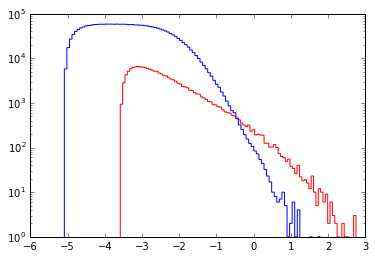

In [62]:
plt.hist(np.log10(Frad_vals[0]),100,histtype='step',color='r')
plt.gca().set_yscale('log')

plt.hist(np.log10(Frad_vals[1]),100,histtype='step',color='b')
plt.gca().set_yscale('log')



# plt.figure()
# plt.hist(Fir_vals_mag[0],100,histtype='step',color='m')
# plt.gca().set_yscale('log')

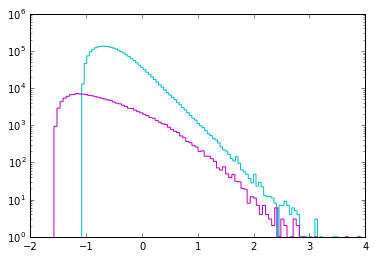

In [63]:

plt.hist(np.log10(Fir_vals[1]),100,histtype='step',color='c')
plt.gca().set_yscale('log')

plt.hist(np.log10(Fir_vals[0]),100,histtype='step',color='m')
plt.gca().set_yscale('log')

In [64]:
# Frad_cuts = [np.percentile(Frad_vals[j],[10,20,30,40,50,60,70,80,90,100]) for j in range(2)]
# Fir_cuts = [np.percentile(Fir_vals[j],[10,20,30,40,50,60,70,80,90,100]) for j in range(2)]
# Fir_cuts_mag = [np.percentile(Fir_vals_mag[j],[10,20,30,40,50,60,70,80,90,100]) for j in range(2)]

logjycuts_rad = [-5,-4,-3,-2,-1,0,1,2]
logjycuts_ir = [-2,-1,0,1,2,3]

In [59]:
# calculate the flux limited correlation values from the mock survey data for comparison

c_for_rad_and_ir_fluxcut_sf_and_agn = [np.zeros((num_fluxcuts,num_fluxcuts)),np.zeros((num_fluxcuts,num_fluxcuts))]
num_sources_remaining_for_rad_and_ir_fluxcut_sf_and_agn = [np.zeros((num_fluxcuts,num_fluxcuts)),np.zeros((num_fluxcuts,num_fluxcuts))]

for j in range(2):
    for radcuti in range(len(logjycuts_rad)):
        for ircuti in range(len(logjycuts_ir)):
            g = (Frad_vals[j]<10.**logjycuts_rad[radcuti])&(Fir_vals[j]<10.**logjycuts_ir[ircuti])

            frad,fir = Frad_vals[j][g],Fir_vals[j][g]
            c_for_rad_and_ir_fluxcut_sf_and_agn[j][radcuti,ircuti] = (mean(frad*fir)-mean(frad)*mean(fir))/np.sqrt((mean(frad**2)-mean(frad)**2)*(mean(fir**2)-mean(fir)**2))
            num_sources_remaining_for_rad_and_ir_fluxcut_sf_and_agn[j][radcuti,ircuti] = np.sum(g)

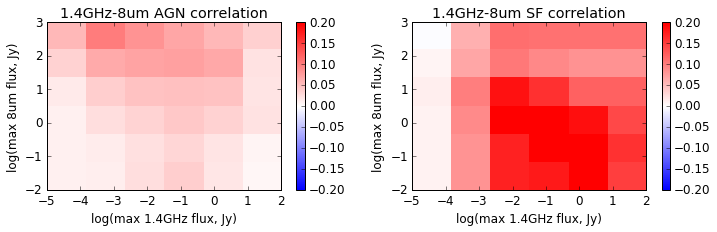

In [71]:
plt.figure(figsize=(12,3))
matplotlib.rcParams.update({'font.size': 12})

e = [min(logjycuts_rad),max(logjycuts_rad),min(logjycuts_ir),max(logjycuts_ir)]

plt.subplot(121)
plt.imshow(c_for_rad_and_ir_fluxcut_sf_and_agn[0],interpolation='nearest',cmap='bwr',vmin=-.2,vmax=.2,extent=e)
plt.colorbar()
plt.title('1.4GHz-8um AGN correlation')
plt.xlabel('log(max 1.4GHz flux, Jy)')
plt.ylabel('log(max 8um flux, Jy)')

plt.subplot(122)
plt.imshow(c_for_rad_and_ir_fluxcut_sf_and_agn[1],interpolation='nearest',cmap='bwr',vmin=-.2,vmax=.2,extent=e)
plt.colorbar()
plt.title('1.4GHz-8um SF correlation')
plt.xlabel('log(max 1.4GHz flux, Jy)')
plt.ylabel('log(max 8um flux, Jy)')

plt.savefig('sim_correlation_agn_and_sf.pdf',bbox_inches='tight')

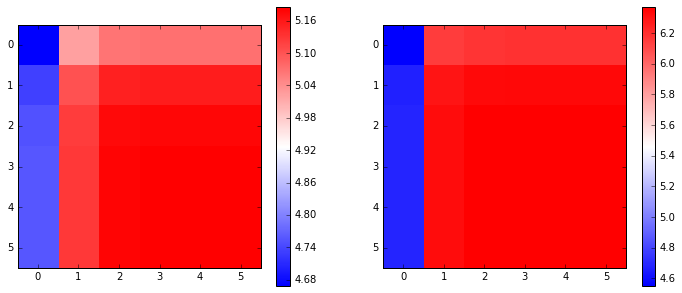

In [61]:
plt.figure(figsize=(12,5))

plt.subplot(121)
plt.imshow(np.log10(num_sources_remaining_for_rad_and_ir_fluxcut_sf_and_agn[0]),interpolation='nearest',cmap='bwr')
plt.colorbar()

plt.subplot(122)
plt.imshow(np.log10(num_sources_remaining_for_rad_and_ir_fluxcut_sf_and_agn[1]),interpolation='nearest',cmap='bwr')
plt.colorbar()